In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from multiprocessing import Pool
import healpy as hp
from astropy.coordinates import SkyCoord
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScale
# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import random
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'StandardScale' from 'sklearn.preprocessing' (/home/dchanda2002/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/__init__.py)

### Create the Fullsky (all Quadrant) Datafile ###

In [2]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u

# output/510u3Q1/pf100.csv has Q1 Backtoback

# Q1 - 180, 360, 540. 15, 90, 224
# Q2 - 0, 180, 540. 15, 90, 224
# Q3 - 0, 180, 540. -15, -90, 224
# Q4 - 180, 360, 540. -15, -90, 224

# The more points here the better

glon = []
glat = []
for lon in np.linspace(180,360,540):
    for lat in np.linspace(15,90,224):
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

dfsky = pd.DataFrame()#pd.read_csv('data/full_sky_decs.csv')[['decs']]
# dfsky['ras'] = pd.read_csv('data/full_sky_ras.csv')[['ras']]

dfsky['glat'] = glat
dfsky['glon'] = glon
dfsky['i100'] = np.genfromtxt('output/510u3Q1/pf100.csv',delimiter=', ')
dfsky['i143'] = np.genfromtxt('output/510u3Q1/pf143.csv',delimiter=', ')
dfsky['i217'] = np.genfromtxt('output/510u3Q1/pf217.csv',delimiter=', ')
dfsky['i353'] = np.genfromtxt('output/510u3Q1/pf353.csv',delimiter=', ')
dfsky['i545'] = np.genfromtxt('output/510u3Q1/pf545.csv',delimiter=', ')
dfsky['i857'] = np.genfromtxt('output/510u3Q1/pf857.csv',delimiter=', ')
dfsky['i090'] = np.genfromtxt('output/510u3Q1/af90.csv',delimiter=', ')
dfsky['i150'] = np.genfromtxt('output/510u3Q1/af150.csv',delimiter=', ')
dfsky['i220'] = np.genfromtxt('output/510u3Q1/af220.csv',delimiter=', ')
dfsky['iros'] = np.genfromtxt('output/510u3Q1/rf.csv',delimiter=', ')
dfsky['i12'] = np.genfromtxt('output/510u3Q1/if12.csv',delimiter=', ')
dfsky['i25'] = np.genfromtxt('output/510u3Q1/if25.csv',delimiter=', ')
dfsky['i60'] = np.genfromtxt('output/510u3Q1/if60.csv',delimiter=', ')
dfsky['i1002'] = np.genfromtxt('output/510u3Q1/if100.csv',delimiter=', ')
dfsky['i100_r'] = np.genfromtxt('output/510u3Q1/pf100_r.csv',delimiter=', ')
dfsky['i143_r'] = np.genfromtxt('output/510u3Q1/pf143_r.csv',delimiter=', ')
dfsky['i217_r'] = np.genfromtxt('output/510u3Q1/pf217_r.csv',delimiter=', ')
dfsky['i353_r'] = np.genfromtxt('output/510u3Q1/pf353_r.csv',delimiter=', ')
dfsky['i545_r'] = np.genfromtxt('output/510u3Q1/pf545_r.csv',delimiter=', ')
dfsky['i857_r'] = np.genfromtxt('output/510u3Q1/pf857_r.csv',delimiter=', ')
dfsky['i090_r'] = np.genfromtxt('output/510u3Q1/af90_r.csv',delimiter=', ')
dfsky['i150_r'] = np.genfromtxt('output/510u3Q1/af150_r.csv',delimiter=', ')
dfsky['i220_r'] = np.genfromtxt('output/510u3Q1/af220_r.csv',delimiter=', ')
dfsky['iros_r'] = np.genfromtxt('output/510u3Q1/rf_r.csv',delimiter=', ')
dfsky['i12_r'] = np.genfromtxt('output/510u3Q1/if12_r.csv',delimiter=', ')
dfsky['i25_r'] = np.genfromtxt('output/510u3Q1/if25_r.csv',delimiter=', ')
dfsky['i60_r'] = np.genfromtxt('output/510u3Q1/if60_r.csv',delimiter=', ')
dfsky['i1002_r'] = np.genfromtxt('output/510u3Q1/if100_r.csv',delimiter=', ')

# If ACT included
# dfsky = dfsky[dfsky.i090!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i150!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i220!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i090_r!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i150_r!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i220_r!=-9999].reset_index(drop = True)
# dfsky = dfsky.reset_index(drop=True)
dfsky['cluster'] = 2
dfsky

,glat,glon,i100,i143,i217,i353,i545,i857,i090,i150,...,i857_r,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster
0,15.000000,180.0,0.000205,0.000252,0.000433,0.001984,-0.050757,-0.135257,-9999.0,-9999.0,...,0.048282,-9999.0,-9999.0,209.333175,0.000190,0.987438,1.504274,1.234711,5.807939,2
1,15.336323,180.0,0.000102,0.000161,0.000336,0.001849,0.008274,0.008131,-9999.0,-9999.0,...,-0.063453,-9999.0,-9999.0,31.595746,0.000008,0.972922,1.459281,1.141236,5.419582,2
2,15.672646,180.0,0.000075,0.000126,0.000300,0.001687,-0.023532,-0.059187,-9999.0,-9999.0,...,0.013565,-9999.0,-9999.0,351.758162,-0.000020,0.970593,1.435349,1.073692,5.261061,2
3,16.008969,180.0,0.000048,0.000101,0.000278,0.001756,-0.020626,-0.113481,-9999.0,-9999.0,...,-0.116126,-9999.0,-9999.0,-207.019321,-0.000014,0.951167,1.400353,1.016796,5.052912,2
4,16.345291,180.0,0.000139,0.000158,0.000320,0.001681,-0.050703,-0.127939,-9999.0,-9999.0,...,-0.026147,-9999.0,-9999.0,149.979656,0.000224,0.955147,1.413057,1.045518,5.169868,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120955,88.654709,360.0,-0.000125,-0.000119,-0.000043,0.000348,-0.006109,-0.023773,-9999.0,-9999.0,...,-0.027789,-9999.0,-9999.0,-9999.000000,0.000071,1.091633,2.151946,0.546747,1.366031,2
120956,88.991031,360.0,-0.000178,-0.000160,-0.000096,0.000339,-0.050352,-0.055378,-9999.0,-9999.0,...,-0.003350,-9999.0,-9999.0,-9999.000000,0.000023,1.094839,2.165545,0.545311,1.351574,2
120957,89.327354,360.0,-0.000064,-0.000053,0.000011,0.000496,0.010376,-0.018906,-9999.0,-9999.0,...,-0.007141,-9999.0,-9999.0,-9999.000000,0.000147,1.064861,2.138694,0.579181,1.401636,2
120958,89.663677,360.0,-0.000011,-0.000014,0.000046,0.000511,0.000373,-0.001388,-9999.0,-9999.0,...,0.004095,-9999.0,-9999.0,-9999.000000,0.000374,1.094506,2.153708,0.581473,1.422644,2


In [12]:
print(dfsky[dfsky["glon"] == 180])
print(dfsky2[dfsky2["glon"] == 180])

          glat   glon      i100      i143      i217      i353      i545  \
0    15.000000  180.0  0.000205  0.000252  0.000433  0.001984 -0.050757   
1    15.336323  180.0  0.000102  0.000161  0.000336  0.001849  0.008274   
2    15.672646  180.0  0.000075  0.000126  0.000300  0.001687 -0.023532   
3    16.008969  180.0  0.000048  0.000101  0.000278  0.001756 -0.020626   
4    16.345291  180.0  0.000139  0.000158  0.000320  0.001681 -0.050703   
..         ...    ...       ...       ...       ...       ...       ...   
219  88.654709  180.0 -0.000093 -0.000071 -0.000004  0.000462  0.013752   
220  88.991031  180.0 -0.000061 -0.000047  0.000004  0.000395 -0.017726   
221  89.327354  180.0 -0.000139 -0.000125 -0.000063  0.000342  0.005994   
222  89.663677  180.0 -0.000092 -0.000083 -0.000001  0.000390  0.004720   
223  90.000000  180.0 -0.000060 -0.000050  0.000011  0.000453 -0.006296   

         i857    i090    i150  ...    i857_r  i090_r  i150_r       i220_r  \
0   -0.135257 -9999.0 

In [3]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u

# output/510u3Q2/pf100.csv has Backtoback

# Q1 - 180, 360, 540. 15, 90, 224
# Q2 - 0, 180, 540. 15, 90, 224
# Q3 - 0, 180, 540. -15, -90, 224
# Q4 - 180, 360, 540. -15, -90, 224

# The more points here the better

glon = []
glat = []
for lon in np.linspace(0,180,540):
    for lat in np.linspace(15,90,224):
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

dfsky2 = pd.DataFrame()#pd.read_csv('data/full_sky_decs.csv')[['decs']]
# dfsky['ras'] = pd.read_csv('data/full_sky_ras.csv')[['ras']]

dfsky2['glat'] = glat
dfsky2['glon'] = glon
dfsky2['i100'] = np.genfromtxt('output/510u3Q2/pf100.csv',delimiter=', ')
dfsky2['i143'] = np.genfromtxt('output/510u3Q2/pf143.csv',delimiter=', ')
dfsky2['i217'] = np.genfromtxt('output/510u3Q2/pf217.csv',delimiter=', ')
dfsky2['i353'] = np.genfromtxt('output/510u3Q2/pf353.csv',delimiter=', ')
dfsky2['i545'] = np.genfromtxt('output/510u3Q2/pf545.csv',delimiter=', ')
dfsky2['i857'] = np.genfromtxt('output/510u3Q2/pf857.csv',delimiter=', ')
dfsky2['i090'] = np.genfromtxt('output/510u3Q2/af90.csv',delimiter=', ')
dfsky2['i150'] = np.genfromtxt('output/510u3Q2/af150.csv',delimiter=', ')
dfsky2['i220'] = np.genfromtxt('output/510u3Q2/af220.csv',delimiter=', ')
dfsky2['iros'] = np.genfromtxt('output/510u3Q2/rf.csv',delimiter=', ')
dfsky2['i12'] = np.genfromtxt('output/510u3Q2/if12.csv',delimiter=', ')
dfsky2['i25'] = np.genfromtxt('output/510u3Q2/if25.csv',delimiter=', ')
dfsky2['i60'] = np.genfromtxt('output/510u3Q2/if60.csv',delimiter=', ')
dfsky2['i1002'] = np.genfromtxt('output/510u3Q2/if100.csv',delimiter=', ')
dfsky2['i100_r'] = np.genfromtxt('output/510u3Q2/pf100_r.csv',delimiter=', ')
dfsky2['i143_r'] = np.genfromtxt('output/510u3Q2/pf143_r.csv',delimiter=', ')
dfsky2['i217_r'] = np.genfromtxt('output/510u3Q2/pf217_r.csv',delimiter=', ')
dfsky2['i353_r'] = np.genfromtxt('output/510u3Q2/pf353_r.csv',delimiter=', ')
dfsky2['i545_r'] = np.genfromtxt('output/510u3Q2/pf545_r.csv',delimiter=', ')
dfsky2['i857_r'] = np.genfromtxt('output/510u3Q2/pf857_r.csv',delimiter=', ')
dfsky2['i090_r'] = np.genfromtxt('output/510u3Q2/af90_r.csv',delimiter=', ')
dfsky2['i150_r'] = np.genfromtxt('output/510u3Q2/af150_r.csv',delimiter=', ')
dfsky2['i220_r'] = np.genfromtxt('output/510u3Q2/af220_r.csv',delimiter=', ')
dfsky2['iros_r'] = np.genfromtxt('output/510u3Q2/rf_r.csv',delimiter=', ')
dfsky2['i12_r'] = np.genfromtxt('output/510u3Q2/if12_r.csv',delimiter=', ')
dfsky2['i25_r'] = np.genfromtxt('output/510u3Q2/if25_r.csv',delimiter=', ')
dfsky2['i60_r'] = np.genfromtxt('output/510u3Q2/if60_r.csv',delimiter=', ')
dfsky2['i1002_r'] = np.genfromtxt('output/510u3Q2/if100_r.csv',delimiter=', ')

# If ACT included
# dfsky = dfsky[dfsky.i090!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i150!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i220!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i090_r!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i150_r!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i220_r!=-9999].reset_index(drop = True)
# dfsky = dfsky.reset_index(drop=True)
dfsky2['cluster'] = 2
dfsky2

,glat,glon,i100,i143,i217,i353,i545,i857,i090,i150,...,i857_r,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster
0,15.000000,0.0,0.000294,0.000406,0.000983,0.006250,0.423640,1.260939,-9999.0,-9999.0,...,0.396755,-9999.0,-9999.0,-9999.0,0.000001,2.195435,3.192256,5.066495,20.242009,2
1,15.336323,0.0,0.000218,0.000318,0.000762,0.004827,-0.268516,-0.767372,-9999.0,-9999.0,...,-0.160379,-9999.0,-9999.0,-9999.0,0.000240,2.034063,2.954213,4.144923,17.136781,2
2,15.672646,0.0,0.000194,0.000301,0.000668,0.004060,-0.580872,-1.768079,-9999.0,-9999.0,...,-0.521574,-9999.0,-9999.0,-9999.0,0.000549,1.881645,2.759966,3.485485,15.357271,2
3,16.008969,0.0,0.000189,0.000260,0.000777,0.004931,0.118845,0.333681,-9999.0,-9999.0,...,-0.626045,-9999.0,-9999.0,-9999.0,-0.000077,1.919025,2.728912,3.617373,16.090462,2
4,16.345291,0.0,0.000124,0.000197,0.000762,0.005642,0.403018,1.226759,-9999.0,-9999.0,...,1.373506,-9999.0,-9999.0,-9999.0,-0.000013,2.001169,2.809675,4.113738,18.470169,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120955,88.654709,180.0,-0.000094,-0.000072,-0.000004,0.000461,0.014283,0.002103,-9999.0,-9999.0,...,0.007990,-9999.0,-9999.0,-9999.0,0.000043,1.082123,2.178259,0.590650,1.557787,2
120956,88.991031,180.0,-0.000060,-0.000046,0.000005,0.000396,-0.017281,-0.036058,-9999.0,-9999.0,...,-0.013303,-9999.0,-9999.0,-9999.0,0.000161,1.074868,2.179478,0.606034,1.529069,2
120957,89.327354,180.0,-0.000139,-0.000124,-0.000063,0.000341,0.005859,0.004110,-9999.0,-9999.0,...,-0.007422,-9999.0,-9999.0,-9999.0,0.000035,1.082500,2.158778,0.604405,1.541063,2
120958,89.663677,180.0,-0.000093,-0.000084,-0.000002,0.000390,0.004821,-0.010911,-9999.0,-9999.0,...,0.017821,-9999.0,-9999.0,-9999.0,0.000010,1.078775,2.178945,0.599330,1.502600,2


In [4]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u

# output/510u3Q3/pf100.csv has Q3 Backtoback

# Q1 - 180, 360, 540. 15, 90, 224
# Q2 - 0, 180, 540. 15, 90, 224
# Q3 - 0, 180, 540. -15, -90, 224
# Q4 - 180, 360, 540. -15, -90, 224

# The more points here the better

glon = []
glat = []
for lon in np.linspace(0,180,540):
    for lat in np.linspace(-15,-90,224):
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

dfsky3 = pd.DataFrame()#pd.read_csv('data/full_sky_decs.csv')[['decs']]
# dfsky['ras'] = pd.read_csv('data/full_sky_ras.csv')[['ras']]

dfsky3['glat'] = glat
dfsky3['glon'] = glon
dfsky3['i100'] = np.genfromtxt('output/510u3Q3/pf100.csv',delimiter=', ')
dfsky3['i143'] = np.genfromtxt('output/510u3Q3/pf143.csv',delimiter=', ')
dfsky3['i217'] = np.genfromtxt('output/510u3Q3/pf217.csv',delimiter=', ')
dfsky3['i353'] = np.genfromtxt('output/510u3Q3/pf353.csv',delimiter=', ')
dfsky3['i545'] = np.genfromtxt('output/510u3Q3/pf545.csv',delimiter=', ')
dfsky3['i857'] = np.genfromtxt('output/510u3Q3/pf857.csv',delimiter=', ')
dfsky3['i090'] = np.genfromtxt('output/510u3Q3/af90.csv',delimiter=', ')
dfsky3['i150'] = np.genfromtxt('output/510u3Q3/af150.csv',delimiter=', ')
dfsky3['i220'] = np.genfromtxt('output/510u3Q3/af220.csv',delimiter=', ')
dfsky3['iros'] = np.genfromtxt('output/510u3Q3/rf.csv',delimiter=', ')
dfsky3['i12'] = np.genfromtxt('output/510u3Q3/if12.csv',delimiter=', ')
dfsky3['i25'] = np.genfromtxt('output/510u3Q3/if25.csv',delimiter=', ')
dfsky3['i60'] = np.genfromtxt('output/510u3Q3/if60.csv',delimiter=', ')
dfsky3['i1002'] = np.genfromtxt('output/510u3Q3/if100.csv',delimiter=', ')
dfsky3['i100_r'] = np.genfromtxt('output/510u3Q3/pf100_r.csv',delimiter=', ')
dfsky3['i143_r'] = np.genfromtxt('output/510u3Q3/pf143_r.csv',delimiter=', ')
dfsky3['i217_r'] = np.genfromtxt('output/510u3Q3/pf217_r.csv',delimiter=', ')
dfsky3['i353_r'] = np.genfromtxt('output/510u3Q3/pf353_r.csv',delimiter=', ')
dfsky3['i545_r'] = np.genfromtxt('output/510u3Q3/pf545_r.csv',delimiter=', ')
dfsky3['i857_r'] = np.genfromtxt('output/510u3Q3/pf857_r.csv',delimiter=', ')
dfsky3['i090_r'] = np.genfromtxt('output/510u3Q3/af90_r.csv',delimiter=', ')
dfsky3['i150_r'] = np.genfromtxt('output/510u3Q3/af150_r.csv',delimiter=', ')
dfsky3['i220_r'] = np.genfromtxt('output/510u3Q3/af220_r.csv',delimiter=', ')
dfsky3['iros_r'] = np.genfromtxt('output/510u3Q3/rf_r.csv',delimiter=', ')
dfsky3['i12_r'] = np.genfromtxt('output/510u3Q3/if12_r.csv',delimiter=', ')
dfsky3['i25_r'] = np.genfromtxt('output/510u3Q3/if25_r.csv',delimiter=', ')
dfsky3['i60_r'] = np.genfromtxt('output/510u3Q3/if60_r.csv',delimiter=', ')
dfsky3['i1002_r'] = np.genfromtxt('output/510u3Q3/if100_r.csv',delimiter=', ')

# If ACT included
# dfsky = dfsky[dfsky.i090!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i150!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i220!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i090_r!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i150_r!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i220_r!=-9999].reset_index(drop = True)
# dfsky = dfsky.reset_index(drop=True)
dfsky3['cluster'] = 2
dfsky3

,glat,glon,i100,i143,i217,i353,i545,i857,i090,i150,...,i857_r,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster
0,-15.000000,0.0,0.000042,0.000070,0.000231,0.001633,0.047694,0.090251,-99.184205,-58.316943,...,0.058832,-77.691408,-42.867235,284.452332,0.000645,1.369332,1.849323,1.409689,6.387066,2
1,-15.336323,0.0,0.000144,0.000145,0.000300,0.001665,0.001373,0.032613,95.029063,-72.679926,...,0.024231,49.969639,-84.603304,-32.749450,0.000840,1.358812,1.887563,1.443022,6.552372,2
2,-15.672646,0.0,0.000115,0.000159,0.000299,0.001528,-0.050618,-0.116404,183.472290,50.169829,...,-0.008988,152.205058,16.839678,-453.796357,0.000984,1.348282,1.903622,1.620092,6.709742,2
3,-16.008969,0.0,-0.000008,0.000009,0.000150,0.001461,-0.000101,0.060670,89.407956,-120.007719,...,-0.063631,81.897669,-69.369589,-34.088127,0.000290,1.329716,1.916206,1.458214,6.201251,2
4,-16.345291,0.0,-0.000115,-0.000111,0.000029,0.001166,-0.033167,-0.078399,-118.469292,-239.319119,...,-0.015752,-73.815165,-134.375418,483.404940,0.000625,1.333874,1.904819,1.412606,6.001437,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120955,-88.654709,180.0,-0.000279,-0.000262,-0.000200,0.000239,-0.008136,0.014696,-126.147646,-80.116109,...,-0.000173,-128.188315,-96.297167,-78.212878,0.000370,1.065609,2.026904,0.582859,1.818470,2
120956,-88.991031,180.0,-0.000165,-0.000144,-0.000082,0.000432,-0.035170,-0.006574,-55.263142,-55.515038,...,-0.038582,-65.028082,-73.851746,49.442374,-0.000076,1.030545,2.013882,0.562777,1.694204,2
120957,-89.327354,180.0,-0.000036,-0.000019,0.000042,0.000586,0.010892,-0.027356,7.755126,-141.279069,...,0.011881,4.512392,-118.224306,-231.504132,0.000257,1.044198,2.032030,0.587648,1.647888,2
120958,-89.663677,180.0,0.000059,0.000083,0.000129,0.000614,0.054394,0.068803,73.353914,5.623449,...,-0.024802,54.674659,-14.596254,-348.704437,0.000421,1.055042,2.056011,0.543430,1.589734,2


In [5]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u

# output/510u3Q4/pf100.csv has Q4 Backtoback

# Q1 - 180, 360, 540. 15, 90, 224
# Q2 - 0, 180, 540. 15, 90, 224
# Q3 - 0, 180, 540. -15, -90, 224
# Q4 - 180, 360, 540. -15, -90, 224

# The more points here the better

glon = []
glat = []
for lon in np.linspace(180,360,540):
    for lat in np.linspace(-15,-90,224):
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

dfsky4 = pd.DataFrame()#pd.read_csv('data/full_sky_decs.csv')[['decs']]
# dfsky['ras'] = pd.read_csv('data/full_sky_ras.csv')[['ras']]

dfsky4['glat'] = glat
dfsky4['glon'] = glon
dfsky4['i100'] = np.genfromtxt('output/510u3Q4/pf100.csv',delimiter=', ')
dfsky4['i143'] = np.genfromtxt('output/510u3Q4/pf143.csv',delimiter=', ')
dfsky4['i217'] = np.genfromtxt('output/510u3Q4/pf217.csv',delimiter=', ')
dfsky4['i353'] = np.genfromtxt('output/510u3Q4/pf353.csv',delimiter=', ')
dfsky4['i545'] = np.genfromtxt('output/510u3Q4/pf545.csv',delimiter=', ')
dfsky4['i857'] = np.genfromtxt('output/510u3Q4/pf857.csv',delimiter=', ')
dfsky4['i090'] = np.genfromtxt('output/510u3Q4/af90.csv',delimiter=', ')
dfsky4['i150'] = np.genfromtxt('output/510u3Q4/af150.csv',delimiter=', ')
dfsky4['i220'] = np.genfromtxt('output/510u3Q4/af220.csv',delimiter=', ')
dfsky4['iros'] = np.genfromtxt('output/510u3Q4/rf.csv',delimiter=', ')
dfsky4['i12'] = np.genfromtxt('output/510u3Q4/if12.csv',delimiter=', ')
dfsky4['i25'] = np.genfromtxt('output/510u3Q4/if25.csv',delimiter=', ')
dfsky4['i60'] = np.genfromtxt('output/510u3Q4/if60.csv',delimiter=', ')
dfsky4['i1002'] = np.genfromtxt('output/510u3Q4/if100.csv',delimiter=', ')
dfsky4['i100_r'] = np.genfromtxt('output/510u3Q4/pf100_r.csv',delimiter=', ')
dfsky4['i143_r'] = np.genfromtxt('output/510u3Q4/pf143_r.csv',delimiter=', ')
dfsky4['i217_r'] = np.genfromtxt('output/510u3Q4/pf217_r.csv',delimiter=', ')
dfsky4['i353_r'] = np.genfromtxt('output/510u3Q4/pf353_r.csv',delimiter=', ')
dfsky4['i545_r'] = np.genfromtxt('output/510u3Q4/pf545_r.csv',delimiter=', ')
dfsky4['i857_r'] = np.genfromtxt('output/510u3Q4/pf857_r.csv',delimiter=', ')
dfsky4['i090_r'] = np.genfromtxt('output/510u3Q4/af90_r.csv',delimiter=', ')
dfsky4['i150_r'] = np.genfromtxt('output/510u3Q4/af150_r.csv',delimiter=', ')
dfsky4['i220_r'] = np.genfromtxt('output/510u3Q4/af220_r.csv',delimiter=', ')
dfsky4['iros_r'] = np.genfromtxt('output/510u3Q4/rf_r.csv',delimiter=', ')
dfsky4['i12_r'] = np.genfromtxt('output/510u3Q4/if12_r.csv',delimiter=', ')
dfsky4['i25_r'] = np.genfromtxt('output/510u3Q4/if25_r.csv',delimiter=', ')
dfsky4['i60_r'] = np.genfromtxt('output/510u3Q4/if60_r.csv',delimiter=', ')
dfsky4['i1002_r'] = np.genfromtxt('output/510u3Q4/if100_r.csv',delimiter=', ')

# If ACT included
# dfsky = dfsky[dfsky.i090!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i150!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i220!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i090_r!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i150_r!=-9999].reset_index(drop = True)
# dfsky = dfsky[dfsky.i220_r!=-9999].reset_index(drop = True)
# dfsky = dfsky.reset_index(drop=True)
dfsky4['cluster'] = 2
dfsky4

,glat,glon,i100,i143,i217,i353,i545,i857,i090,i150,...,i857_r,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster
0,-15.000000,180.0,0.000251,0.000322,0.000794,0.004779,-0.008363,-0.085151,7.198704,-177.395911,...,-0.173661,27.549817,-110.558373,-296.033485,0.000201,1.393153,1.942025,2.622240,12.404424,2
1,-15.336323,180.0,0.000157,0.000277,0.000779,0.004922,-0.048048,-0.171783,-13.154756,18.730939,...,0.066985,-29.398526,-9.416594,-430.996680,0.000367,1.431435,1.930150,2.742985,13.098141,2
2,-15.672646,180.0,0.000194,0.000199,0.000900,0.005984,0.467380,1.338171,-16.239204,89.832028,...,0.201739,-37.830695,46.153214,-198.941789,0.000085,1.462545,1.960274,2.940649,14.383284,2
3,-16.008969,180.0,0.000197,0.000185,0.000924,0.006108,0.021386,-0.014399,6.316119,32.084297,...,0.406922,-12.190154,6.894508,-91.438840,0.000007,1.466665,1.924028,3.124869,15.703209,2
4,-16.345291,180.0,0.000158,0.000144,0.000883,0.006189,0.165857,0.492527,-42.148434,-23.313514,...,0.119177,-21.108536,-4.400341,-50.015677,0.000019,1.510293,1.919956,3.101684,15.866467,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120955,-88.654709,360.0,-0.000113,-0.000098,-0.000053,0.000462,0.002552,0.009069,-55.658273,-121.975842,...,-0.011311,-33.396408,-61.944156,12.097457,-0.000001,1.060922,2.037327,0.578333,1.613181,2
120956,-88.991031,360.0,-0.000065,-0.000050,0.000023,0.000482,0.001538,-0.002168,26.450599,-22.731271,...,0.006610,25.303441,-33.001284,0.833384,-0.000039,1.049723,2.029719,0.567631,1.654499,2
120957,-89.327354,360.0,-0.000005,0.000012,0.000073,0.000626,-0.010401,0.010029,6.922787,-23.648194,...,-0.003459,22.127814,-25.440247,192.143547,0.000274,1.030128,1.958229,0.564241,1.641117,2
120958,-89.663677,360.0,0.000086,0.000077,0.000130,0.000630,-0.002661,0.029260,51.937304,-43.303354,...,0.011477,50.687187,-20.313509,402.131802,0.000298,1.061227,2.024882,0.568785,1.661015,2


In [8]:
dfsky = dfsky[dfsky["glon"] != 180]

In [14]:
dfsky3 = dfsky3[dfsky3["glon"] != 180]

In [15]:
all_sky = pd.concat([dfsky, dfsky2, dfsky3, dfsky4]).reset_index(drop = True)
all_sky

,glat,glon,i100,i143,i217,i353,i545,i857,i090,i150,...,i857_r,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster
0,15.000000,180.333952,0.000120,0.000178,0.000359,0.001969,0.056823,0.127271,-9999.000000,-9999.000000,...,-0.022280,-9999.000000,-9999.000000,209.333175,0.000191,0.969666,1.431233,1.204155,5.674495,2
1,15.336323,180.333952,0.000070,0.000109,0.000278,0.001827,0.084108,0.172678,-9999.000000,-9999.000000,...,-0.047610,-9999.000000,-9999.000000,15.795600,0.000104,0.952577,1.425312,1.168456,5.491787,2
2,15.672646,180.333952,0.000038,0.000085,0.000256,0.001727,0.055424,0.141171,-9999.000000,-9999.000000,...,0.119705,-9999.000000,-9999.000000,336.109578,0.000116,0.944024,1.395191,1.143555,5.466510,2
3,16.008969,180.333952,0.000067,0.000086,0.000255,0.001609,-0.036625,-0.105322,-9999.000000,-9999.000000,...,0.015432,-9999.000000,-9999.000000,-200.409009,0.000027,0.935358,1.411173,1.107866,5.243680,2
4,16.345291,180.333952,0.000146,0.000141,0.000273,0.001576,-0.085779,-0.190601,-9999.000000,-9999.000000,...,-0.040339,-9999.000000,-9999.000000,130.143265,0.000300,0.917350,1.379523,1.002739,4.994269,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483387,-88.654709,360.000000,-0.000113,-0.000098,-0.000053,0.000462,0.002552,0.009069,-55.658273,-121.975842,...,-0.011311,-33.396408,-61.944156,12.097457,-0.000001,1.060922,2.037327,0.578333,1.613181,2
483388,-88.991031,360.000000,-0.000065,-0.000050,0.000023,0.000482,0.001538,-0.002168,26.450599,-22.731271,...,0.006610,25.303441,-33.001284,0.833384,-0.000039,1.049723,2.029719,0.567631,1.654499,2
483389,-89.327354,360.000000,-0.000005,0.000012,0.000073,0.000626,-0.010401,0.010029,6.922787,-23.648194,...,-0.003459,22.127814,-25.440247,192.143547,0.000274,1.030128,1.958229,0.564241,1.641117,2
483390,-89.663677,360.000000,0.000086,0.000077,0.000130,0.000630,-0.002661,0.029260,51.937304,-43.303354,...,0.011477,50.687187,-20.313509,402.131802,0.000298,1.061227,2.024882,0.568785,1.661015,2


In [16]:
# all_sky['i100'].to_csv("output/510u3Full/pf100.csv", index = False)
# all_sky['i143'].to_csv("output/510u3Full/pf143.csv", index = False)
# all_sky['i217'].to_csv("output/510u3Full/pf217.csv", index = False)
# all_sky['i353'].to_csv("output/510u3Full/pf353.csv", index = False)
# all_sky['i545'].to_csv("output/510u3Full/pf545.csv", index = False)
# all_sky['i857'].to_csv("output/510u3Full/pf857.csv", index = False)
# all_sky['i090'].to_csv("output/510u3Full/af90.csv", index = False)
# all_sky['i150'].to_csv("output/510u3Full/af150.csv", index = False)
# all_sky['i220'].to_csv("output/510u3Full/af220.csv", index = False)
# all_sky['iros'].to_csv("output/510u3Full/rf.csv", index = False)
# all_sky['i12'].to_csv("output/510u3Full/if12.csv", index = False)
# all_sky['i25'].to_csv("output/510u3Full/if25.csv", index = False)
# all_sky['i60'].to_csv("output/510u3Full/if60.csv", index = False)
# all_sky['i1002'].to_csv("output/510u3Full/if100.csv", index = False)
# all_sky['i100_r'].to_csv("output/510u3Full/pf100_r.csv", index = False)
# all_sky['i143_r'].to_csv("output/510u3Full/pf143_r.csv", index = False)
# all_sky['i217_r'].to_csv("output/510u3Full/pf217_r.csv", index = False)
# all_sky['i353_r'].to_csv("output/510u3Full/pf353_r.csv", index = False)
# all_sky['i545_r'].to_csv("output/510u3Full/pf545_r.csv", index = False)
# all_sky['i857_r'].to_csv("output/510u3Full/pf857_r.csv", index = False)
# all_sky['i090_r'].to_csv("output/510u3Full/af90_r.csv", index = False)
# all_sky['i150_r'].to_csv("output/510u3Full/af150_r.csv", index = False)
# all_sky['i220_r'].to_csv("output/510u3Full/af220_r.csv", index = False)
# all_sky['iros_r'].to_csv("output/510u3Full/rf_r.csv", index = False)
# all_sky['i12_r'].to_csv("output/510u3Full/if12_r.csv", index = False)
# all_sky['i25_r'].to_csv("output/510u3Full/if25_r.csv", index = False)
# all_sky['i60_r'].to_csv("output/510u3Full/if60_r.csv", index = False)
# all_sky['i1002_r'].to_csv("output/510u3Full/if100_r.csv", index = False)

In [17]:
# all_sky["glat"].to_csv("output/510u3Full/glat.csv", index = False)
# all_sky["glon"].to_csv("output/510u3Full/glon.csv", index = False)

## OLD stuff ##

In [ ]:
import healpy as hp

pl143 = hp.read_map('data/mask_comprass.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False)
hp.visufunc.projscatter(cluster_map['glon'],cluster_map['glat'],lonlat=True,c=cluster_map['clusterp'],alpha = 0.2, s=1,vmin=0, vmax=1)

In [39]:
# dfsky3 = pd.DataFrame()
# dfsky3['i545_r'] = np.genfromtxt('output/510u3Q2/pf545_r.csv',delimiter=', ')
# dfsky3['i857_r'] = np.genfromtxt('output/510u3Q2/pf857_r.csv',delimiter=', ')
# dfsky3[dfsky3["i545_r"] >= -2]

# There should be no command that drops values by itself!! WHAT

,i545_r,i857_r
0,0.121986,0.396755
1,-0.057762,-0.160379
2,-0.171630,-0.521574
3,-0.229119,-0.626045
4,0.489890,1.373506
...,...,...
120879,0.010995,0.007990
120880,-0.004514,-0.013303
120881,-0.006209,-0.007422
120882,0.007915,0.017821


In [36]:
df = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)
df['i100'] = np.loadtxt('output/510/pr100.csv',delimiter=', ')
df['i143'] = np.loadtxt('output/510/pr143.csv',delimiter=', ')
df['i217'] = np.loadtxt('output/510/pr217.csv',delimiter=', ')
df['i353'] = np.loadtxt('output/510/pr353.csv',delimiter=', ')
df['i545'] = np.loadtxt('output/510/pr545.csv',delimiter=', ')
df['i857'] = np.loadtxt('output/510/pr857.csv',delimiter=', ')
df['i090'] = np.loadtxt('output/510/ar90.csv',delimiter=', ')
df['i150'] = np.loadtxt('output/510/ar150.csv',delimiter=', ')
df['i220'] = np.loadtxt('output/510/ar220.csv',delimiter=', ')
df['iros'] = np.loadtxt('output/510/rr.csv',delimiter=', ')
df['cluster'] = 1

df2 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df2['i100'] = np.loadtxt('output/510/pv100.csv',delimiter=', ')
df2['i143'] = np.loadtxt('output/510/pv143.csv',delimiter=', ')
df2['i217'] = np.loadtxt('output/510/pv217.csv',delimiter=', ')
df2['i353'] = np.loadtxt('output/510/pv353.csv',delimiter=', ')
df2['i545'] = np.loadtxt('output/510/pv545.csv',delimiter=', ')
df2['i857'] = np.loadtxt('output/510/pv857.csv',delimiter=', ')
df2['i090'] = np.loadtxt('output/510/av90.csv',delimiter=', ')
df2['i150'] = np.loadtxt('output/510/av150.csv',delimiter=', ')
df2['i220'] = np.loadtxt('output/510/av220.csv',delimiter=', ')
df2['iros'] = np.loadtxt('output/510/rv.csv',delimiter=', ')
df2['cluster'] = 0

df3 = df.append(df2, ignore_index=True).reset_index(drop=True)

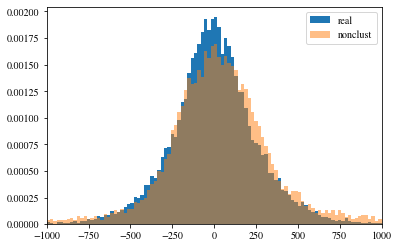

In [38]:
plt.hist(df[df.i220!=-9999].i220,density=True,bins=100,range=(-1000,1000),label='real')
plt.hist(df2[df2.i220!=-9999].i220,density=True,bins=100,alpha=0.5,range=(-1000,1000),label='nonclust')
plt.xlim(-1000,1000)
plt.legend()

In [39]:
df5 = pd.read_csv('data/awd.csv', skiprows = 0, index_col=0)
df5['i100'] = np.loadtxt('output/beam/pr100.csv',delimiter=', ')
df5['i143'] = np.loadtxt('output/beam/pr143.csv',delimiter=', ')
df5['i217'] = np.loadtxt('output/beam/pr217.csv',delimiter=', ')
df5['i353'] = np.loadtxt('output/beam/pr353.csv',delimiter=', ')
df5['i545'] = np.loadtxt('output/beam/pr545.csv',delimiter=', ')
df5['i857'] = np.loadtxt('output/beam/pr857.csv',delimiter=', ')
df5['i090'] = np.loadtxt('output/beam/ar90.csv',delimiter=', ')
df5['i150'] = np.loadtxt('output/beam/ar150.csv',delimiter=', ')
df5['i220'] = np.loadtxt('output/beam/ar220.csv',delimiter=', ')
df5['iros'] = np.loadtxt('output/beam/rr.csv',delimiter=', ')
df5['cluster'] = 1

df4 = pd.read_csv('data/voids.csv', skiprows = 0, index_col=0)
df4['i100'] = np.loadtxt('output/beam/pv100.csv',delimiter=', ')
df4['i143'] = np.loadtxt('output/beam/pv143.csv',delimiter=', ')
df4['i217'] = np.loadtxt('output/beam/pv217.csv',delimiter=', ')
df4['i353'] = np.loadtxt('output/beam/pv353.csv',delimiter=', ')
df4['i545'] = np.loadtxt('output/beam/pv545.csv',delimiter=', ')
df4['i857'] = np.loadtxt('output/beam/pv857.csv',delimiter=', ')
df4['i090'] = np.loadtxt('output/beam/av90.csv',delimiter=', ')
df4['i150'] = np.loadtxt('output/beam/av150.csv',delimiter=', ')
df4['i220'] = np.loadtxt('output/beam/av220.csv',delimiter=', ')
df4['iros'] = np.loadtxt('output/beam/rv.csv',delimiter=', ')
df4['cluster'] = 0

df6 = df5.append(df4, ignore_index=True).reset_index(drop=True)

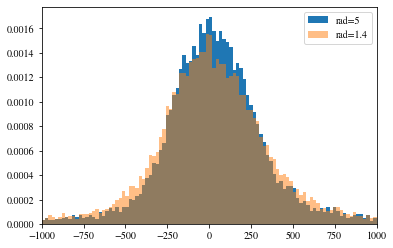

In [47]:
plt.hist(df2[df2.i220!=-9999].i220,density=True,bins=100,range=(-1000,1000),label='rad=5')
plt.hist(df4[df4.i220!=-9999].i220,density=True,bins=100,alpha=0.5,range=(-1000,1000),label='rad=1.4')
plt.xlim(-1000,1000)
plt.legend()

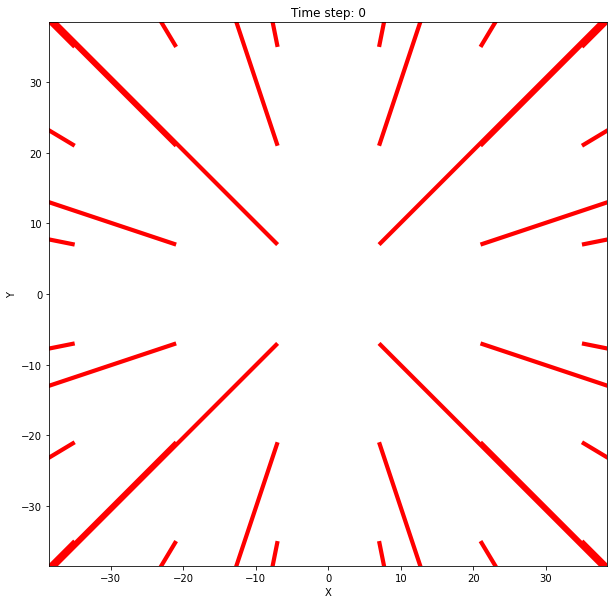

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a grid of positions and velocities
x_positions, y_positions = np.meshgrid(np.linspace(-1, 1, 6), np.linspace(-1, 1, 6))
x_velocities, y_velocities = np.zeros_like(x_positions), np.zeros_like(y_positions)

# Create figure and axes objects for plotting
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('X')
ax.set_ylabel('Y')

# A function that takes the positions and velocities and updates them according to gravity
def iterate_timestep(x_positions, y_positions, x_velocities, y_velocities):
    # Calculate gravitational forces between each particle
    x_f, y_f = gravity_forces(x_positions, y_positions)
    
    # Update velocities
    x_velocities += x_f
    y_velocities += y_f
    
    # Update positions
    x_positions += x_velocities
    y_positions += y_velocities
    
    # Return the updated positions and velocities
    return x_positions, y_positions, x_velocities, y_velocities

# A function that takes the positions and returns a matrix of the gravitational forces applied between each particle
def gravity_forces(x_positions, y_positions):
    x_f, y_f = np.zeros_like(x_positions), np.zeros_like(y_positions)
    for i in range(x_positions.shape[0]):
        for j in range(x_positions.shape[1]):
            for u in range(x_positions.shape[0]):
                for v in range(x_positions.shape[1]):
                    # Don't calculate the force on a particle due to itself
                    if i == u and j == v:
                        continue
                    # Calculate the force in the x and y directions
                    x_f[i, j] += -(x_positions[i, j] - x_positions[u, v])
                    y_f[i, j] += -(y_positions[i, j] - y_positions[u, v])
    return x_f, y_f

# Simulation loop
for _ in range(200):
    # Iterate through one timestep of the simulation
    x_positions, y_positions, x_velocities, y_velocities = iterate_timestep(x_positions, y_positions,
                                                                          x_velocities, y_velocities)
    # Plot the new positions of the particles
    ax.cla()  # Clear the axes
    ax.quiver(x_positions, y_positions, x_velocities, y_velocities, scale=1, color='red')
    ax.set_title(f'Time step: {_}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.pause(0.1)  # Pause for 0.1s to give us time to observe the animation

plt.show()